In [172]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from scipy.integrate import quad
#plt.style.use('ggplot')
plt.style.use('default')

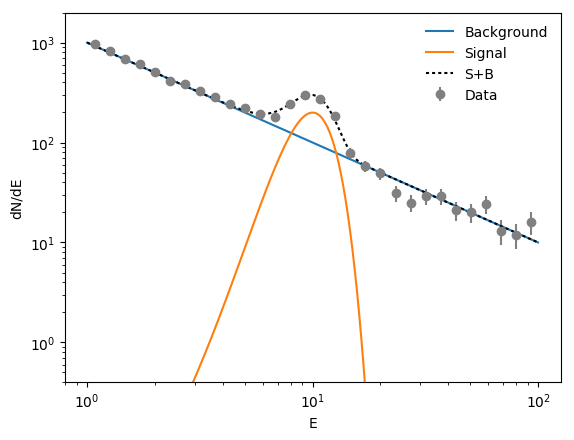

In [173]:
def signal_shape(E, mu=10, var=2):
    return stats.norm.pdf(E, mu, var)

def background_shape(E, gamma=-1):
    return E**gamma

def generate_data(E, bkg_norm, sig_norm):
    return np.random.poisson(bkg_norm * signal_shape(E) + 
                             sig_norm * background_shape(E))

def visualise_model(bkg_norm, sig_norm):
    fig, ax = plt.subplots()
    E = np.logspace(0,2,200)
    b = blk_norm*background_shape(E)
    s = sig_norm*signal_shape(E)
    ax.plot(E, b, label='Background')
    ax.plot(E, s, label='Signal')
    ax.plot(E, s+b, color='black', linestyle='dotted', label='S+B')

    E = np.logspace(0,2,30+1)
    E = (E[1:] + E[:-1]) / 2 # bin centers
    N = generate_data(E, bkg_norm, sig_norm)
    ax.errorbar(E, N, yerr=np.sqrt(N), fmt='o', color='grey', label='Data')
    ax.set_ylim(0.4, 2*np.maximum(s.max(), b.max()))
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel('E')
    ax.set_ylabel('dN/dE')
    ax.legend(frameon=False)
    return fig, ax

sig_norm = 1000
bkg_norm = 1000

visualise_model(bkg_norm, sig_norm);